<a href="https://colab.research.google.com/github/youminpark/NEUR265/blob/main/notebooks/Machine_Learning_03_06_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Machine Learning

This notebook will introduce you to a common machine learning problem: **classification**.

##By the end of this notebook, you will be able to:

- Train and test a simple linear classifier

##What is machine learning?

<img src = 'https://drive.google.com/uc?id=1rtw01EuJ6XEyT7hFKwHXyuuJkNXmI4C7'>


Consider that the goal of inferential statistics (a t-test, for example) is to arrive at some conclusion about a *dataset*. More specifically, in the case of a 1-sample t-test: How likely is it that the mean of a sample distribution is also in a population distribution? For this question, a t-test (our *program*) is a great tool for the job!

One really nice thing about being an experimentalist is that you can (at least *attempt* to) control the conditions that give you your data - in my case, what task are mice running? Which neurons are expressing a virus? Which neurons are turned "on" or "off"? Which stage of training are mice on?

In this way, I *know* my data really well! This is what allows me to make interpretations about what a t-test result means.

What if we *don't* know our data really well? What if we're able to collect some data, but don't have the full picture of what the data represent?

<img src = 'https://drive.google.com/uc?id=1eQeiL6-o7YQXCLpJTQJQeAJFoD3_mZnG'>



In this case, maybe we can create an algorithm that can guess for us! This problem is at the heart of **classification**, a really common instance of **supervised machine learning**.

We're going to create a simple **binary**, or **linear** classifier.

<img src = 'https://drive.google.com/uc?id=1oqq0U8iJHYVs6bG1nl-aaYHpseAdpYOm'>

Linear classifiers try to assign a data point to an outcome - the outcome must be binary (i.e., the data point is either *true* or *false*).

Here, we're going to train an algorithm to do something fairly simple - predict whether a given point in space falls above (*true*) or below (*false*) a straight line.

In [1]:
#Import relevant modules and adjust figure size

from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3)

##Part 1: A simple perceptron model

Let’s examine a simple perceptron that accepts inputs, processes those inputs, and returns an output:

In [2]:
def my_perceptron(input1, input2, w1, w2, theta):
    # Define the activity of the perceptron, x.
    x = input1*w1 + input2*w2 + theta

    # Apply a binary threshold,
    if x > 0:
        return 1
    else:
        return 0

Here, the inputs are some bits of data (the data we're trying to classify), w1 and w2 are **weights** (it might be useful to think of these as how we let the algorithm know how *important* each piece of data is), and a constant (theta). The decision boundary is set to "zero" - any output greater than zero is classified as *true*, and any output less than zero is classified as *false*.

><b>Task:</b> Apply this function to different sets of inputs. Consider,

  `input1 = 1, input2 = 0, w1 = 0.5, w2 = -0.5, theta = 0`

  and

  `input1 = 1, input2 = 0, w1 = 0.5, w2 = -0.5, theta = -1`

  What do you find?



In [6]:
#Run your function here!
print(my_perceptron(1,0,0.5,-0.5,0))
print(my_perceptron(1,0,0.5,-0.5,-1))

1
0


#Part 2. Build a perceptron classifier.

We’d like to create a method to train a perceptron to classify a point (x,y) as above or below a line. Let’s implement this training procedure.



##Step 1. Provide perceptron with inputs and known answer.

First, let’s make a function that computes a line, and determines if a given y value is above or below the line. We’ll use this function to return the correct (“known”) answer. Having known answers is important for training the perceptron. We’ll use the known answers to tell the when it’s right or wrong (i.e., when the perceptron makes an error).

Let’s define the function (`known_answer`), and give it four inputs:

`slope`

`intercept`

`x`

`y`

where the (`x,y`) value is a point we choose on the plane. The function should return one output:

`desired_output`

where,

`desired_output = 1`, if the y value (the last input) is above the line, and

`desired_putput = 0`, if the y value (the last input) is below the line.



In [7]:
def known_answer(slope, intercept, x, y):

  yline = slope*x + intercept  # Compute y-value on the line.
  if y > yline:                # If the input y value is above the line,
      return 1                 # ... indicate this with output = 1;
  else:                        # Otherwise, the input y is below the line,
      return 0

Consider the (`x,y`) point,

`x,y = 0.7,3`

and the line with slope and intercept,

`slope = 2 intercept = 1`

Is the (`x,y`) point above or below the line?

To answer this, let’s ask our function!

In [8]:
x,y = 0.7,3
slope = 2
intercept = 1
correct_answer = known_answer(slope, intercept, x, y)
print(correct_answer)


1


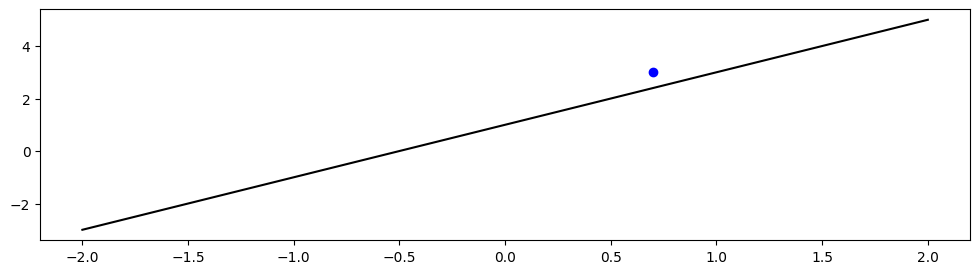

In [9]:
# Plot it to know that it's true!

x_range = linspace(-2,2,100)
plt.plot(x_range, slope*x_range+intercept,color = "black")
plt.scatter(x,y,color = "blue")

##Step 2: Ask perceptron to guess an answer.

Our next step is to compare our desired output (computed in Step 1) to the output guessed by the perceptron. To do so, we’ll need to compute the feedforward solution for the perceptron (i.e., given the inputs and bias, determine the perceptron output). Let’s do so,

In [10]:
def feedforward(x, y, wx, wy, wb):

  # Fix the bias.
  bias = 1

  # Define our weighted point in space.
  point = x*wx + y*wy + wb*bias

  # Apply the binary threshold,
  if point > 0:
      return 1
  else:
      return 0

This function takes five inputs:

`x` = the x coordinate of the point we choose in the plane.

`y` = the y coordinate of the point we choose in the plane.

`wx` = the weight of x input.

`wy` = the weight of y input.

`wb` = the weight of the bias (always = 1).

And this function returns one output:

the perceptron’s guess: Is the point above (1) or below (0) the line?

Again consider the (x,y) point,

x,y = 0.7,3

and set initial values for the perceptron weights. Let’s just set these all to 0.5; our goal in the rest of this notebook will be to train the perceptron by adjusting these weights. But for now,

wx,wy,wb = 0.5

Then, ask the perceptron for its guess: Is the point above or below the line?

In [11]:
x,y = 0.7, 3
wx,wy,wb = 3 * [0.5]
perceptron_guess = feedforward(x, y, wx, wy, wb)
print(perceptron_guess)

1


## Step 3: Compute the error.

We’ve now answered the question “Is the (x,y) point above the line?” in two ways:

the known answer, and

the perceptron’s guess.

Let’s compute the error as the difference between these two answers:

In [12]:
error = correct_answer - perceptron_guess
print(error)

0


## Step 4: Adjust all weights according to the error.

To update the weights, we’ll use the expression,

`new weight = weight + error * input * learning constant`

We need to compute this for each weight (`wx, wy, wb`).

First, let’s set the learning constant

In [13]:
learning_constant = 0.01

Then, we can compute the new weights

In [14]:
wx = wx + error*x   *learning_constant
wy = wy + error*y   *learning_constant
wb = wb + error*1   *learning_constant

Notice that, in the update to `wb` we use the fact that the bias equals 1.

## Step 5: Return to Step 1 and repeat …

Let's train our perceptron and see if it gets better over time! We could try to do this by hand, for example by repeating the cells above. To do so, we’d choose a new point in the (`x,y`) plane, determine whether it’s above the line 2x+1, ask the perceptron to guess whether it’s above the line, then use the error to update the perceptron’s weights.

But we want to evaluate this procedure 2000 times. Doing so by hand would be a total pain, and highly error prone. Instead, let’s ask the computer to do the boring work of multiple repetitions. To do so, let’s collect the code above, and examine 2000 (x,y) points chosen randomly in the plane.

In [15]:
slope     = 2;                      # Define the line with slope,
intercept = 1;                      # ... and intercept.

wx,wy,wb = 3*[0.5];                 # Choose initial values for the perceptron's weights

learning_constant = 0.01;           # And, set the learning constant.

estimated_slope = zeros(2000)       # Variables to hold the perceptron estimates.
estimated_intercept = zeros(2000)
all_errors = zeros(2000)

><b>Task:</b> Create a <code>for</code> loop that does the following 2000 times:

1. Chooses a new `x` and `y` value at random (use <code>x = randn(1)</code> and <code>y = randn(1)</code> for this).

2. Calls your <code>known_answer</code> function and outputs the <code>correct_answer</code> variable based on your randomly chosen <code>x</code> and <code>y</code> coordinates.

3. Calls your <code>feedforward</code> function and outputs the perceptron's guess based on your randomly chosen <code>x</code> and <code>y</code> coordinates.

4. Calculates the <code>error</code> (<code>correct_answer - perceptron_guess</code>) and stores this value in a new column of a list variable called <code>all_errors</code>.

5. Adjusts weights according to the error.

6. Asks the perceptron to make a line based on its guess. To do this, define the following terms in each iteration of the loop: <code>estimated_slope[i] = -wx/wy</code>, and <code>estimated_intercept[i] = -wb/wy</code>, where <code>i</code> is your looping variable.



In [28]:
#Your for loop here!
i=1

for i in range(1,2000):
  x=randn(1)
  y=randn(1)

  correct_answer = known_answer(slope,intercept,x,y)
  perceptron_guess = feedforward(x,y,wx,wy,wb)
  error = correct_answer - perceptron_guess

  all_errors[i] = error

  wx = wx + error*x*learning_constant
  wy = wy + error*y*learning_constant
  wb = wb + error*1*learning_constant

  estimated_slope[i] = -wx/wy
  estimated_intercept[i] = -wb/wy

  i=i+1

<ipython-input-28-6dabdb2a62c0>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_slope[i] = -wx/wy
<ipython-input-28-6dabdb2a62c0>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_intercept[i] = -wb/wy


When your done, check how well your perceptron did!

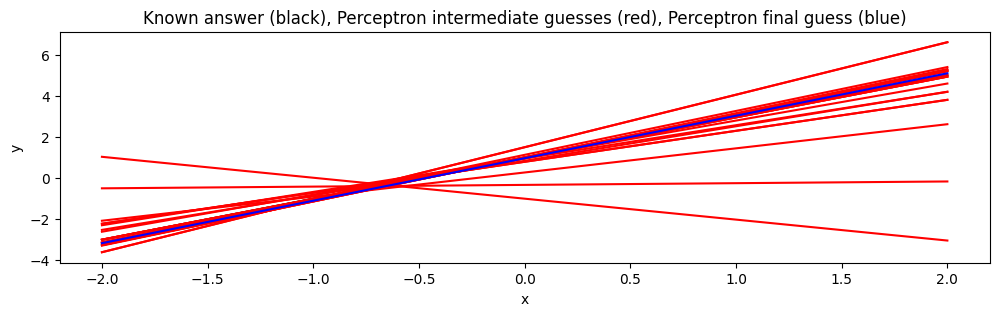

In [29]:
x_range = linspace(-2,2,100);                  # For a range of x-values,
fig, ax = subplots()
ax.plot(x_range, slope*x_range+intercept, 'k') # ... plot the true line,

for k in range(1,2000,100):                    # ... and plot some intermediate perceptron guesses
    ax.plot(x_range, estimated_slope[k]*x_range+estimated_intercept[k], 'r')

ax.plot(x_range, estimated_slope[-1]*x_range+estimated_intercept[-1], 'b')
xlabel('x')
ylabel('y')
title('Known answer (black), Perceptron intermediate guesses (red), Perceptron final guess (blue)');

[-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


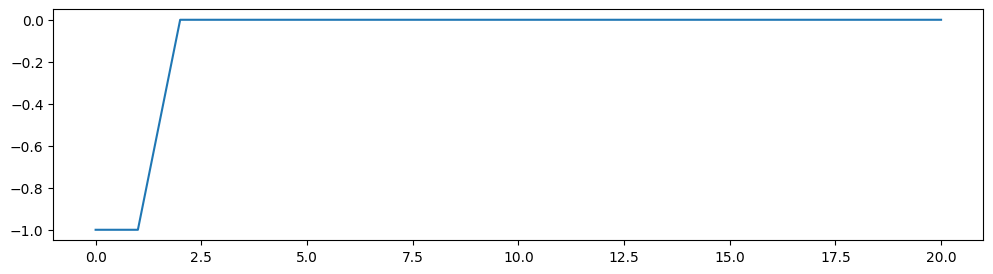

In [31]:
#Evaluate accuracy of classifier every 100 iterations and see how it changes w.r.t. time
error_sample = zeros(21);

for i in range(0,20):
  error_sample[i] = all_errors[i*100];

print(error_sample)

plt.plot(error_sample)

In [33]:
# Time to import patch_seq_expanded data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

expanded_url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(expanded_url);